In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading training file

mnist = pd.read_csv(r"./dataset/mnist_train.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Separate the labels and variables

X = mnist.drop(['label'] , axis = 1)
y = mnist['label']

In [4]:
X.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

Actual  value :  6


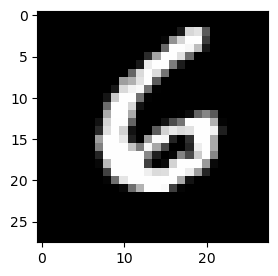

In [6]:
# Display the pixels in an image

plt.figure(figsize = (3,3))

idx = 90
print("Actual  value : ",y.iloc[idx])

grid_data = X.iloc[idx].to_numpy().reshape(28,28)

plt.imshow(X = grid_data ,interpolation= "None" , cmap = "gray" )

plt.show()


### 2D Visualization

In [7]:
# Pick first 15k datapoints

V = X.head(15000)
l = y.head(15000)

In [8]:
V.shape , l.shape

((15000, 784), (15000,))

### DataPreprocessing : column Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(V)

In [10]:
std_data[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.83641471e-03, -1.15102110e-02, -8.16523799e-03, -8.16523799e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.16523799e-03, -1.75380447e-02, -2.03868054e-02,
       -2.02746434e-02, -1.94690096e-02, -2.23159415e-02, -2.42878065e-02,
       -2.61581127e-02, -2.86942896e-02, -3.18450784e-02, -3.39222553e-02,
       -3.02824093e-02, -2.69757824e-02, -2.38119257e-02, -2.29805181e-02,
       -2.03676010e-02, -1.29029831e-02, -1.15477032e-02, -8.16523799e-03,
        0.00000000e+00,  

In [11]:
len(std_data[0])

784

### Calculate Covariance matrix

In [12]:
sample_V = std_data.copy()

# Covariance matrix
cov_mat = np.matmul(sample_V.T,sample_V)

In [13]:
print("shape of covariance matrix : \n",cov_mat.shape)

shape of covariance matrix : 
 (784, 784)


### Finding top two eigen values and corresponding eigen vectors for projecting onto 2D space.

In [14]:
from scipy.linalg import eigh

In [15]:
# eigh : returns the eigen values in ascending order 

# this code will generate only top two eigen values (782,783)

eig_val , eig_vec = eigh(cov_mat ,subset_by_index = (782,783) )

In [16]:
eig_val

array([459916.45167454, 616509.42694774])

In [17]:
eig_vec

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [18]:
print("Shape of eigen vectors : ",eig_vec.shape)

Shape of eigen vectors :  (784, 2)


In [19]:
# transpose the eigen vector matric

# eig_vec = eig_vec.T

In [20]:
print("New Shape of eigen vectors : ",eig_vec.shape)

New Shape of eigen vectors :  (784, 2)


### Projecting original sample data onto 2D space

In [21]:
sample_V.shape

(15000, 784)

In [22]:
new_coor_X = np.matmul(sample_V ,eig_vec )
new_coor_X.shape

(15000, 2)

In [23]:
new_coor_X

array([[-4.45704983,  0.96076924],
       [-7.39779508, -8.65815498],
       [ 9.64068954, -2.0828543 ],
       ...,
       [ 1.12527157,  5.75309962],
       [-0.02666788,  7.39420531],
       [ 1.83171889,  5.47713446]])

In [24]:
l.to_numpy()

array([5, 0, 4, ..., 7, 1, 7], dtype=int64)

In [25]:
l_reshape = l.to_numpy().reshape(-1,1)

In [26]:
# Appending transformed coordinates and labels

new_coor = np.hstack((new_coor_X , l_reshape))

In [27]:
new_coor

array([[-4.45704983,  0.96076924,  5.        ],
       [-7.39779508, -8.65815498,  0.        ],
       [ 9.64068954, -2.0828543 ,  4.        ],
       ...,
       [ 1.12527157,  5.75309962,  7.        ],
       [-0.02666788,  7.39420531,  1.        ],
       [ 1.83171889,  5.47713446,  7.        ]])

### converting into DF

In [28]:
mnist_trans = pd.DataFrame(data = new_coor , columns = ["1st_principal" , "2nd_principal" ,"labels"])

In [29]:
mnist_trans.shape

(15000, 3)

In [30]:
mnist_trans.head(5)

,1st_principal,2nd_principal,labels
0,-4.457050,0.960769,5.0
1,-7.397795,-8.658155,0.0
2,9.640690,-2.082854,4.0
3,-3.356074,7.187465,1.0
4,2.979880,4.933889,9.0


In [31]:
mnist_trans['labels'] = pd.to_numeric(mnist_trans['labels'] ,downcast = "integer" )

In [32]:
mnist_trans['labels'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int8)

## Plotting

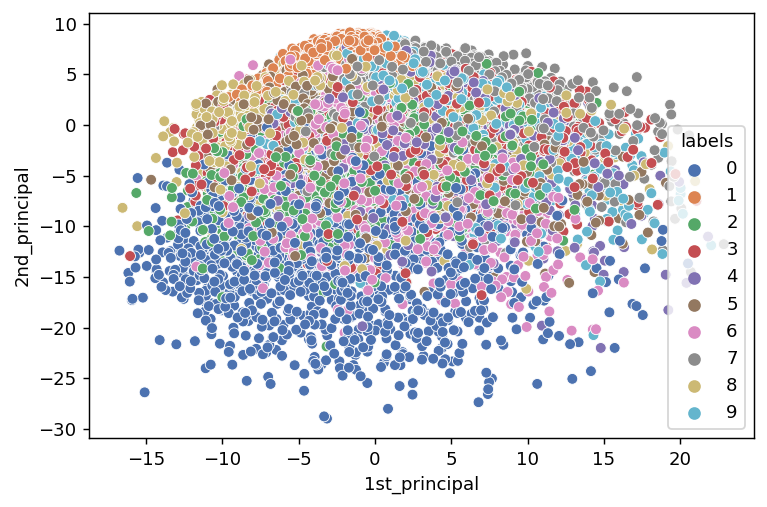

In [33]:
fig = plt.figure(figsize = (6,4) , dpi = 130)
sns.scatterplot(data = mnist_trans , x = "1st_principal" , y = "2nd_principal" , hue = "labels",
                palette  = 'deep')
fig.tight_layout()
plt.show()

# PCA using scikit learn

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()

In [36]:
# Required number of components

pca.n_components = 2

In [37]:
pca_trans= pca.fit_transform(sample_V)

In [38]:
# 2D array
pca_trans

array([[-0.96076965, -4.45694979],
       [ 8.65816126, -7.39793745],
       [ 2.08287806,  9.64044384],
       ...,
       [-5.75306109,  1.12523246],
       [-7.39418954, -0.02653875],
       [-5.47709863,  1.83172777]])

In [39]:
print("transformed shape of X : ",pca_trans.shape)

transformed shape of X :  (15000, 2)


### Converting to DF

In [40]:
pca_data = np.hstack((pca_trans ,l_reshape ))

In [41]:
mnist_trans2 = pd.DataFrame(data = pca_data , columns = ["1st_principal" , "2nd_principal" ,"labels"])

In [42]:
mnist_trans2.head(2)

,1st_principal,2nd_principal,labels
0,-0.960770,-4.456950,5.0
1,8.658161,-7.397937,0.0


In [43]:
mnist_trans2['labels'] = pd.to_numeric(mnist_trans2['labels'] , downcast= "integer")

## Plotting

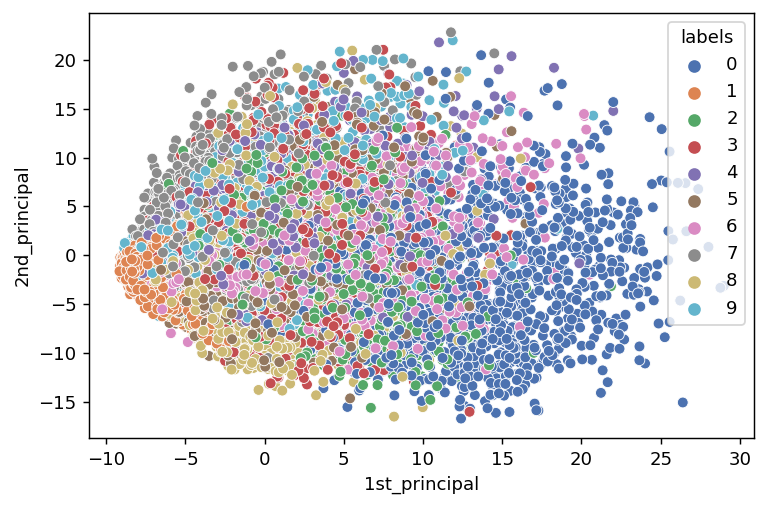

In [44]:
fig = plt.figure(figsize = (6,4) , dpi = 130)

sns.scatterplot(data = mnist_trans2 , x = "1st_principal" , y = "2nd_principal" , hue = "labels",
                palette  = 'deep')

fig.tight_layout()

plt.show()

## Percentage Variance Explained

In [45]:
sample_V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
sample_V.shape

(15000, 784)

In [46]:
l

0        5
1        0
2        4
3        1
4        9
        ..
14995    1
14996    2
14997    7
14998    1
14999    7
Name: label, Length: 15000, dtype: int64

In [55]:
pca2 = PCA()

In [56]:
# Required number of components

pca2.n_components = 784

In [57]:
pca = PCA()

In [58]:
pca_trans2 = pca2.fit_transform(sample_V)

In [59]:
# 2D array
pca_trans2

array([[-9.60769244e-01, -4.45704983e+00,  1.67711549e-01, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 8.65815498e+00, -7.39779508e+00, -2.44332664e+00, ...,
        -3.66477116e-15,  4.21796825e-15, -5.79603899e-16],
       [ 2.08285430e+00,  9.64068954e+00, -5.87829175e+00, ...,
        -5.62977151e-16,  5.56650836e-16,  7.95189334e-16],
       ...,
       [-5.75309962e+00,  1.12527157e+00, -5.57602038e+00, ...,
        -3.06918422e-17,  1.89347914e-17, -4.15434943e-18],
       [-7.39420531e+00, -2.66678766e-02,  3.10309052e+00, ...,
         2.66010211e-17, -5.32502237e-17, -1.25091824e-18],
       [-5.47713446e+00,  1.83171889e+00, -3.90134540e+00, ...,
        -7.32205980e-18,  4.33660891e-17,  2.78896068e-18]])

In [61]:
len(pca_trans2[0])

784

#### Percentage variance Explained

In [67]:
perct_var_expl = pca2.explained_variance_/np.sum(pca2.explained_variance_)

In [68]:
perct_var_expl

array([6.00886381e-02, 4.48261649e-02, 3.97657348e-02, 3.02378807e-02,
       2.60752627e-02, 2.35492741e-02, 2.07282771e-02, 1.83329353e-02,
       1.67524276e-02, 1.51872509e-02, 1.44503110e-02, 1.23484562e-02,
       1.18021107e-02, 1.14278492e-02, 1.10662686e-02, 1.07695153e-02,
       1.01175824e-02, 9.69691338e-03, 9.43434478e-03, 9.27269134e-03,
       8.89677963e-03, 8.56680651e-03, 8.10024216e-03, 7.82684058e-03,
       7.64327689e-03, 7.35527420e-03, 7.29403170e-03, 7.10915468e-03,
       6.79165133e-03, 6.69309025e-03, 6.58506355e-03, 6.32321954e-03,
       6.14731762e-03, 6.05295279e-03, 5.87851675e-03, 5.75555761e-03,
       5.68866174e-03, 5.64748039e-03, 5.49558897e-03, 5.44038464e-03,
       5.10508203e-03, 4.97732426e-03, 4.88769165e-03, 4.80791781e-03,
       4.79024663e-03, 4.68573342e-03, 4.59233502e-03, 4.57241486e-03,
       4.47879185e-03, 4.39950229e-03, 4.31599018e-03, 4.23645221e-03,
       4.12804926e-03, 4.10719199e-03, 3.98992788e-03, 3.87166549e-03,
      

In [69]:
pca2.explained_variance_

array([4.11033687e+01, 3.06631410e+01, 2.72015760e+01, 2.06840893e+01,
       1.78366688e+01, 1.61087774e+01, 1.41790868e+01, 1.25405638e+01,
       1.14594244e+01, 1.03887722e+01, 9.88467173e+00, 8.44690718e+00,
       8.07318196e+00, 7.81717002e+00, 7.56983237e+00, 7.36683961e+00,
       6.92088776e+00, 6.63313096e+00, 6.45352206e+00, 6.34294374e+00,
       6.08580299e+00, 5.86008632e+00, 5.54093503e+00, 5.35391589e+00,
       5.22834995e+00, 5.03134297e+00, 4.98945031e+00, 4.86298600e+00,
       4.64579923e+00, 4.57837895e+00, 4.50448376e+00, 4.32537052e+00,
       4.20504559e+00, 4.14049574e+00, 4.02117354e+00, 3.93706388e+00,
       3.89130405e+00, 3.86313413e+00, 3.75923347e+00, 3.72147119e+00,
       3.49210891e+00, 3.40471677e+00, 3.34340398e+00, 3.28883504e+00,
       3.27674715e+00, 3.20525534e+00, 3.14136657e+00, 3.12774028e+00,
       3.06369787e+00, 3.00946020e+00, 2.95233410e+00, 2.89792651e+00,
       2.82377394e+00, 2.80950662e+00, 2.72929263e+00, 2.64839575e+00,
      

In [70]:
cum_variance_expl = np.cumsum(perct_var_expl)

In [71]:
cum_variance_expl

array([0.06008864, 0.1049148 , 0.14468054, 0.17491842, 0.20099368,
       0.22454296, 0.24527123, 0.26360417, 0.2803566 , 0.29554385,
       0.30999416, 0.32234261, 0.33414472, 0.34557257, 0.35663884,
       0.36740836, 0.37752594, 0.38722285, 0.3966572 , 0.40592989,
       0.41482667, 0.42339348, 0.43149372, 0.43932056, 0.44696383,
       0.45431911, 0.46161314, 0.4687223 , 0.47551395, 0.48220704,
       0.4887921 , 0.49511532, 0.50126264, 0.50731559, 0.51319411,
       0.51894966, 0.52463833, 0.53028581, 0.5357814 , 0.54122178,
       0.54632686, 0.55130419, 0.55619188, 0.5609998 , 0.56579004,
       0.57047578, 0.57506811, 0.57964053, 0.58411932, 0.58851882,
       0.59283481, 0.59707126, 0.60119931, 0.6053065 , 0.60929643,
       0.6131681 , 0.61700757, 0.62082661, 0.62458948, 0.62830146,
       0.63198428, 0.63558305, 0.63914565, 0.64265688, 0.64606082,
       0.64944081, 0.6527917 , 0.65606932, 0.6593305 , 0.66255324,
       0.66575293, 0.66891425, 0.67206141, 0.67519194, 0.67825

In [75]:
ser = pd.Series(data = cum_variance_expl )
ser

0      0.060089
1      0.104915
2      0.144681
3      0.174918
4      0.200994
         ...   
779    1.000000
780    1.000000
781    1.000000
782    1.000000
783    1.000000
Length: 784, dtype: float64

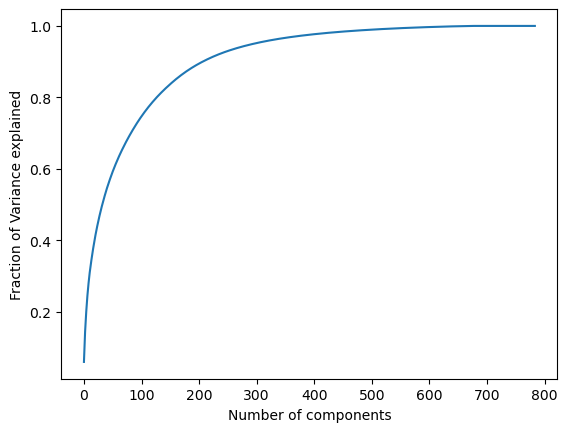

In [79]:
plt.plot(ser)

plt.xlabel("Number of components")
plt.ylabel("Fraction of Variance explained")
plt.show()